# Data Analysis of Jeopardy Questions

## Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.options.display.width=None

## read data file (source: https://www.kaggle.com/tunguz/200000-jeopardy-questions)

In [59]:
df=pd.read_csv('JEOPARDY_CSV.csv')

## data cleaning

In [60]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


### remove extra space from column names

In [61]:
df.columns = [x.strip() for x in df.columns]

### remove dollar sign and commas from value column, convert none values to NaN, change all to integers

In [62]:
df['Value'] = df['Value'].str.replace("$", '')
df['Value'] = df['Value'].str.replace(",", '')
df['Value'] = df['Value'].replace("None",np.nan).fillna(0).astype(int)

### show show number column

In [71]:
df.drop('Show Number', inplace=True, axis=1)

### check for any rows with null values and drop them if number is small

In [63]:
df.isnull().sum()

Show Number    0
Air Date       0
Round          0
Category       0
Value          0
Question       0
Answer         2
dtype: int64

In [68]:
df[df['Answer'].isnull()]

,Show Number,Air Date,Round,Category,Value,Question,Answer
94817,4346,2003-06-23,Jeopardy!,"GOING ""N""SANE",200,"It often precedes ""and void""",NaN
143297,6177,2011-06-21,Double Jeopardy!,NOTHING,400,"This word for ""nothing"" precedes ""and void"" to...",NaN


In [69]:
df.drop(df.index[[94817, 143297]], inplace=True)

### check question column for rows with abnormal clue type ie video clues and remove

In [12]:
df['Question'].value_counts().head(10)

[audio clue]     17
[video clue]     14
(audio clue)      5
[filler]          5
Abigail Smith     4
Hainan            4
Greenland         4
Iron pyrite       3
California        3
Baffin Island     3
Name: Question, dtype: int64

In [13]:
aud1=df[df['Question']=='[audio clue]']
aud2=df[df['Question']=='(audio clue)']
vid=df[df['Question']=='[video clue]']
filler=df[df['Question']=='[filler]']

df.drop(aud1.index, inplace=True)
df.drop(aud2.index, inplace=True)
df.drop(vid.index, inplace=True)
df.drop(filler.index, inplace=True)

### convert dates to timestamp and extra year for new column

In [14]:
df['Air Date']=pd.to_datetime(df['Air Date'], format='%Y-%m-%d')

In [15]:

def get_year (date_val):
    return (date_val).year

In [16]:
df['Year']=df['Air Date'].apply(get_year)

## Plots

### plot top 10 most common categories for each round

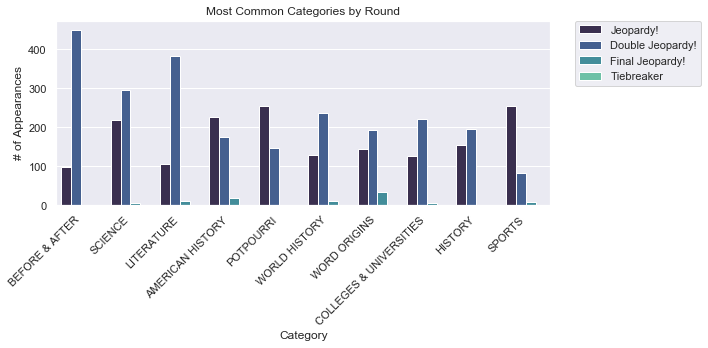

In [42]:
ax=sns.countplot(x='Category', data=df, hue='Round',order=df['Category'].value_counts().head(10).index, palette='mako')
ax.set_title('Most Common Categories by Round')
ax.set_xlabel('Category')
ax.set_ylabel('# of Appearances')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

#### create separate dataframes for first and second rounds, plot top 10 categories for each round

In [18]:
df_r1=df[df['Round']=='Jeopardy!']
df_r2=df[df['Round']=='Double Jeopardy!']

In [19]:
df_r1['Category'].value_counts().head()

STUPID ANSWERS      255
POTPOURRI           255
SPORTS              253
ANIMALS             233
AMERICAN HISTORY    227
Name: Category, dtype: int64

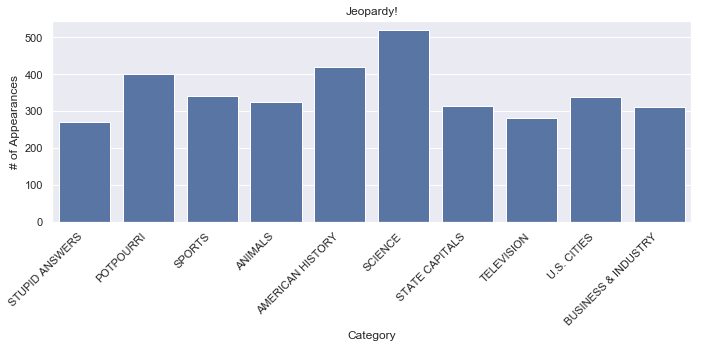

In [26]:
ax=sns.countplot(x='Category', data=df, order=df_r1['Category'].value_counts().head(10).index, color='b')
ax.set_title('Jeopardy!')
ax.set_xlabel('Category')
ax.set_ylabel('# of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

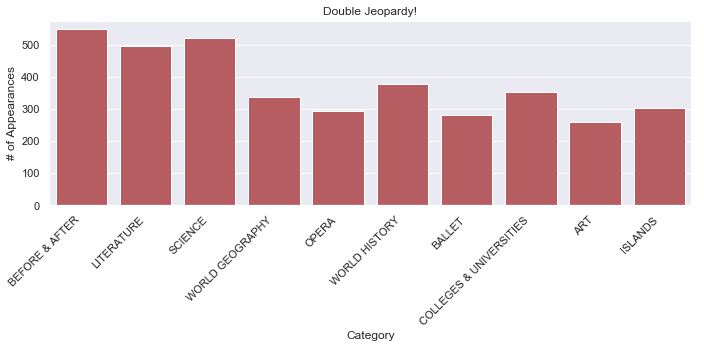

In [28]:
ax=sns.countplot(x='Category', data=df, order=df_r2['Category'].value_counts().head(10).index, color='r')
ax.set_title('Double Jeopardy!')
ax.set_xlabel('Category')
ax.set_ylabel('# of Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#### plot top category for first and second round counts for each year

In [22]:
df_stupid=df[df['Category']=='STUPID ANSWERS']
df_bf=df[df['Category']=='BEFORE & AFTER']


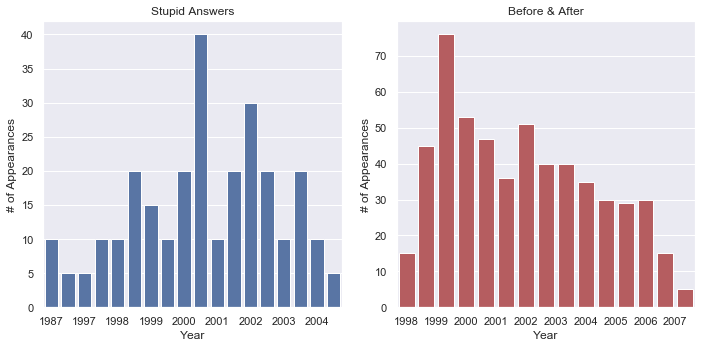

In [33]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax =plt.subplots(1,2)

ax1=sns.countplot(df_stupid['Year'], ax=ax[0], color='b')

ax2=sns.countplot(df_bf['Year'], ax=ax[1], color='r')

for i in range(ax.shape[0]):
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(10))

ax1.set_ylabel('# of Appearances')
ax2.set_ylabel('# of Appearances')
ax1.set_title('Stupid Answers')
ax2.set_title('Before & After')
 
plt.tight_layout();


